In [2]:
%matplotlib inline

import datacube
from deafrica_tools.plotting import rgb, display_map
import datacube
import odc.algo
import matplotlib.pyplot as plt
from datacube.utils.cog import write_cog

from deafrica_tools.plotting import display_map, rgb
dc = datacube.Datacube(app="04_Plotting")
# 15.85828652, 80.78694696
# 15.75418332, 81.02203692
lat_range = (15.75418332, 15.85828652)
lon_range = (80.78694696, 81.02203692)
time_range = ('2022-01-15', '2023-02-15')
# display_map(x=lon_range, y=lat_range)
ds = dc.load(product="s2a_sen2cor_granule",
                 measurements=["B04_10m","B03_10m","B02_10m", "B08_10m"],
             x=lon_range,
             y=lat_range,
             time=time_range,
             output_crs='EPSG:6933',
             resolution=(-30, 30))

print(ds)

<xarray.Dataset>
Dimensions:      (time: 2, y: 427, x: 757)
Coordinates:
  * time         (time) datetime64[ns] 2022-08-23T05:14:41.977841 2023-02-09T...
  * y            (y) float64 1.998e+06 1.998e+06 ... 1.985e+06 1.985e+06
  * x            (x) float64 7.795e+06 7.795e+06 ... 7.817e+06 7.818e+06
    spatial_ref  int32 6933
Data variables:
    B04_10m      (time, y, x) uint16 1609 1571 1573 1567 ... 1290 1267 1264 1252
    B03_10m      (time, y, x) uint16 2022 1978 1971 1972 ... 1612 1575 1578 1531
    B02_10m      (time, y, x) uint16 1468 1495 1473 1470 ... 1524 1468 1525 1489
    B08_10m      (time, y, x) uint16 4510 4596 4372 4512 ... 1136 1137 1138 1150
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref


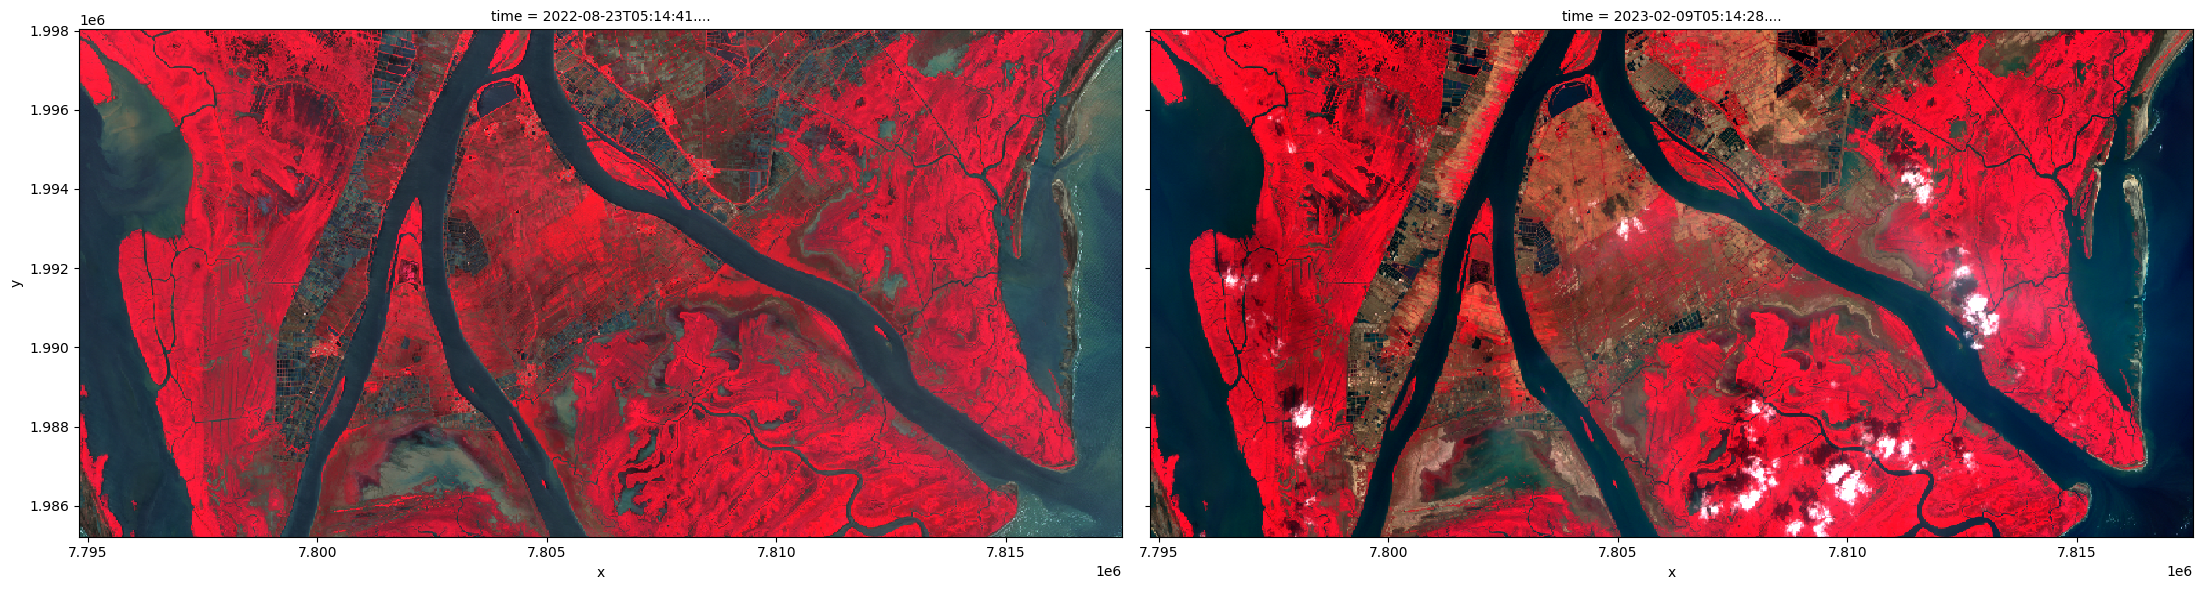

In [3]:
# Load the data from the Datacube
dataset = ds

rgb(ds, bands=['B08_10m', 'B04_10m', 'B03_10m'], index=[0, 1])

In [4]:
# convert dataset to float32 datatype so no-data values are set to NaN
dataset =  odc.algo.to_f32(dataset)

# Calculate the components that make up the NDVI calculation
band_diff = 2.5*(dataset.B08_10m - dataset.B03_10m)
band_sum = dataset.B08_10m + 6*dataset.B04_10m - 7.5*dataset.B02_10m + 1

# Calculate NDVI and store it as a measurement in the original dataset
evi = band_diff / band_sum
print(evi)

<xarray.DataArray (time: 2, y: 427, x: 757)>
array([[[  1.9714738 ,   2.328767  ,   2.1720643 , ...,   0.6674628 ,
           0.76145154,   0.6305349 ],
        [  2.1296449 ,   2.1057632 ,   2.089096  , ...,   0.6055974 ,
           0.59207344,   0.6       ],
        [  2.1350932 ,   1.9347147 ,   1.63664   , ...,   0.53101104,
           0.6828553 ,   0.3456553 ],
        ...,
        [ -1.956229  ,  -5.3414097 ,  -2.468085  , ...,   0.7133363 ,
           1.4097444 ,   6.991701  ],
        [ -1.5886393 ,  -1.376702  ,  -1.3348165 , ...,   1.2008481 ,
           1.3691219 ,   5.021866  ],
        [ -3.1171284 ,  -1.4422535 ,  -2.717647  , ...,  -1.2583301 ,
          26.677631  ,   7.911964  ]],

       [[  2.433959  ,   2.280983  ,   2.449558  , ...,   0.7723867 ,
           0.66917425,   0.64640176],
        [  2.410462  ,   2.317559  ,   2.4479253 , ...,   0.67077726,
           0.62637526,   0.5976048 ],
        [  2.546062  ,   2.5149343 ,   2.4615169 , ...,   0.48309532,
      

<Figure size 800x800 with 0 Axes>

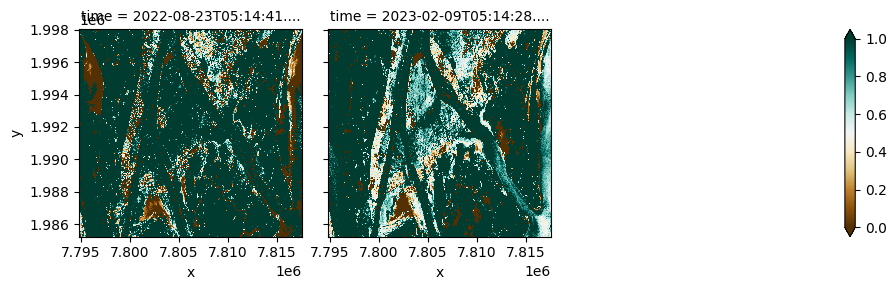

In [6]:
plt.figure(figsize=(8, 8))
evi.plot(col='time', cmap="BrBG", vmin=0, vmax=1, col_wrap=3)
plt.show()